**Perform Exploratory Data Analysis (EDA) on the Walmart dataset to gain insights into sales and customer behavior. The dataset contains information about orders, customers, products, and sales quantity. The main objective is to identify patterns, trends, and top-performing segments, products, and customers to help the sales and marketing team improve their strategies and increase sales and revenue.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [4]:
df = pd.read_csv('C:/Users/User/Desktop/portfolio/Walmart_data.csv')
#df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       3203 non-null   object        
 1   Order Date     3203 non-null   datetime64[ns]
 2   Customer ID    3203 non-null   object        
 3   Customer Name  3203 non-null   object        
 4   Segment        3203 non-null   object        
 5   Country        3203 non-null   object        
 6   City           3203 non-null   object        
 7   State          3203 non-null   object        
 8   Product ID     3203 non-null   object        
 9   Category       3203 non-null   object        
 10  Sub-Category   3203 non-null   object        
 11  Product Name   3203 non-null   object        
 12  Quantity       3203 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 325.4+ KB


In [7]:
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Product ID,Category,Sub-Category,Product Name,Quantity
0,CA-2013-101343,2013-07-18,RA-19885,Ruben Ausman,Corporate,United States,Los Angeles,California,OFF-ST-10003479,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",2
1,CA-2014-163405,2014-12-22,BN-11515,Bradley Nguyen,Consumer,United States,Los Angeles,California,OFF-AR-10003811,Office Supplies,Art,Newell 327,3
2,CA-2014-163405,2014-12-22,BN-11515,Bradley Nguyen,Consumer,United States,Los Angeles,California,OFF-AR-10001246,Office Supplies,Art,Newell 317,2
3,US-2013-115819,2013-04-20,JO-15280,Jas O'Carroll,Consumer,United States,Los Angeles,California,OFF-AR-10000823,Office Supplies,Art,Newell 307,3
4,US-2013-115819,2013-04-20,JO-15280,Jas O'Carroll,Consumer,United States,Los Angeles,California,OFF-AR-10004456,Office Supplies,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,5


In [8]:
# Question: Most profitable categories
top_products_quantity = df.groupby('Product Name')['Quantity'].sum().nlargest(10)
print(top_products_quantity)

Product Name
Staples                                                                 216
Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear     32
Cardinal EasyOpen D-Ring Binders                                         31
Eldon Wave Desk Accessories                                              30
Eldon Shelf Savers Cubes and Bins                                        29
Logitech?P710e Mobile Speakerphone                                       29
Vinyl Sectional Post Binders                                             29
Dana Halogen Swing-Arm Architect Lamp                                    28
Memorex Micro Travel Drive 16 GB                                         28
4009 Highlighters by Sanford                                             27
Name: Quantity, dtype: int64


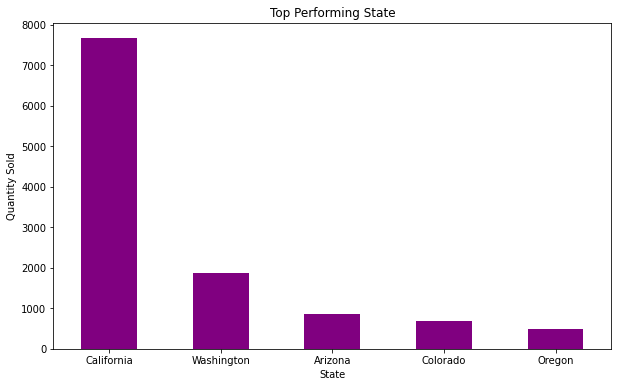

In [9]:
# Question: Top-performing states
top_regions = df.groupby('State')['Quantity'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='purple')
plt.title('Top Performing State')
plt.xlabel('State')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0, ha='center')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Office Supplies'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Technology')])

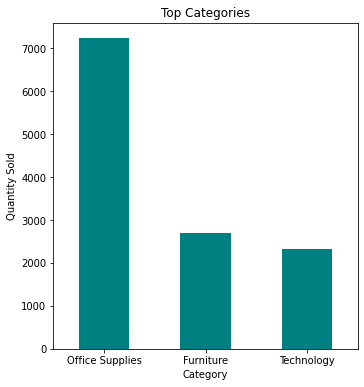

In [10]:
# Question: Most profitable categories
top_categories = df.groupby('Category')['Quantity'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_categories.plot(kind='bar', color='teal')
plt.title('Top Categories')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0, ha='center')

(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

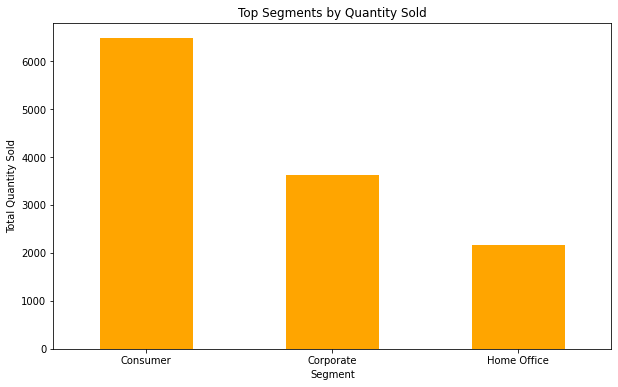

In [26]:
# Find the top segments based on quantity sold
# Calculate the total quantity sold for each segment
segment_quantity = df.groupby('Segment')['Quantity'].sum()
top_segments = segment_quantity.nlargest()

# Visualization - Bar Chart
plt.figure(figsize=(10, 6))
ax = top_segments.plot(kind='bar', color='orange')
plt.title('Top Segments by Quantity Sold')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0, ha='center')

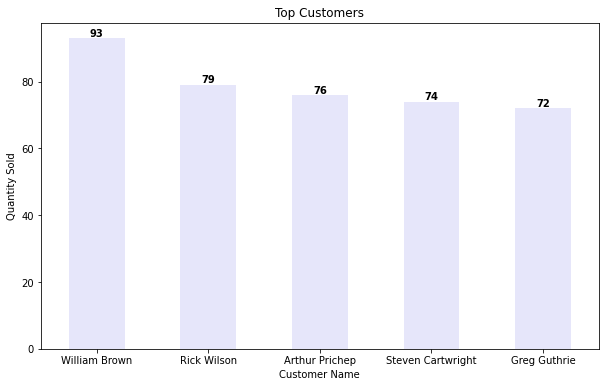

In [12]:
# Question: Top customers and their preferred categories
top_customers = df.groupby('Customer Name')['Quantity'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
ax = top_customers.plot(kind='bar', color='lavender')
plt.title('Top Customers')
plt.xlabel('Customer Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0, ha='center')

# Add labels for the quantities on top of each bar
for idx, value in enumerate(top_customers):
    ax.text(idx, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.show()

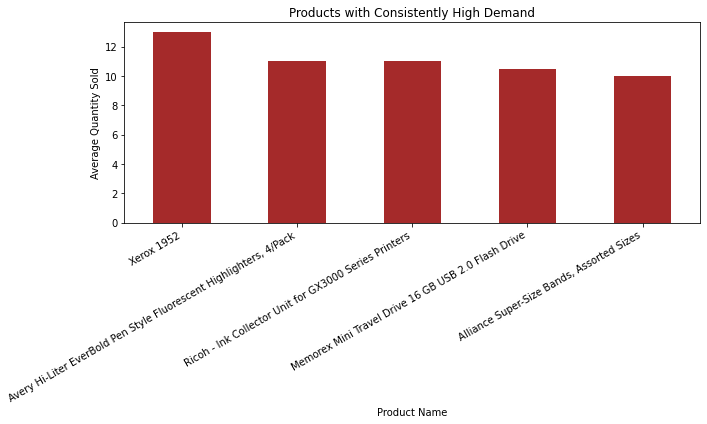

In [13]:
# Question: Products with consistently high demand throughout the year
consistently_high_demand_products = df.groupby('Product Name')['Quantity'].mean().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
consistently_high_demand_products.plot(kind='bar', color='brown')
plt.title('Products with Consistently High Demand')
plt.xlabel('Product Name')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

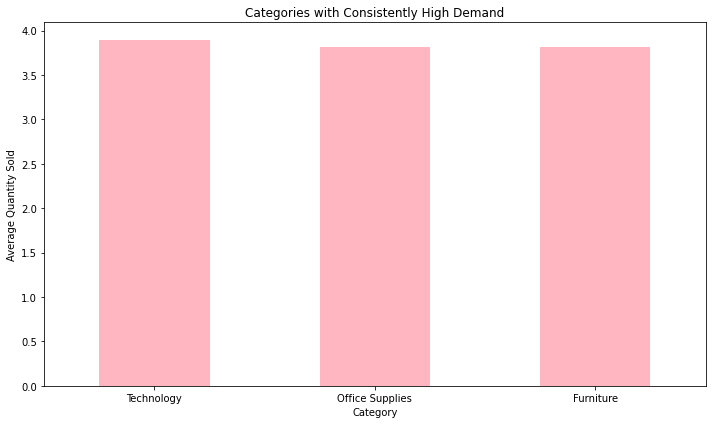

In [14]:
# Question: Categories with consistently high demand throughout the year
consistently_high_demand_categories = df.groupby('Category')['Quantity'].mean().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
consistently_high_demand_categories.plot(kind='bar', color='lightpink')
plt.title('Categories with Consistently High Demand')
plt.xlabel('Category')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


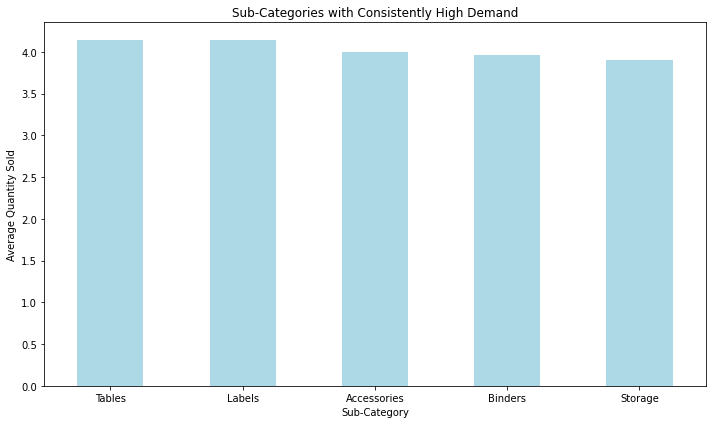

In [15]:
# Question: Sub-Categories with consistently high demand throughout the year
consistently_high_demand_subcategories = df.groupby('Sub-Category')['Quantity'].mean().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
consistently_high_demand_subcategories.plot(kind='bar', color='lightblue')
plt.title('Sub-Categories with Consistently High Demand')
plt.xlabel('Sub-Category')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



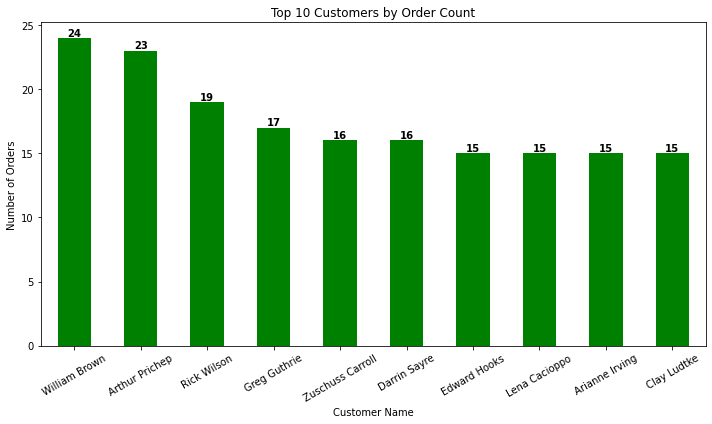

In [16]:
# Question: Find the top 10 customers based on the count of orders
top_10_customers = df['Customer Name'].value_counts().nlargest(10)

# Visualization
plt.figure(figsize=(10, 6))
ax = top_10_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=30, ha='center')

# Add numbers above each bar
for idx, value in enumerate(top_10_customers):
    ax.text(idx, value, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

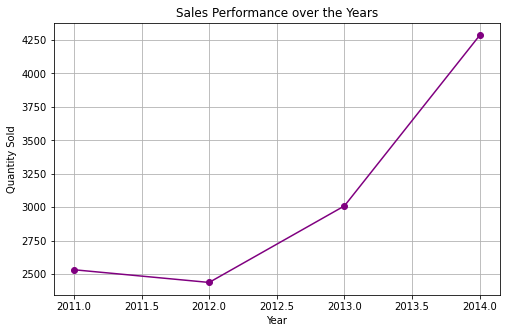

In [17]:
# Question: Sales performance over the years
df['Year'] = df['Order Date'].dt.year
sales_performance_over_years = df.groupby('Year')['Quantity'].sum()

# Visualization
plt.figure(figsize=(8, 5))
sales_performance_over_years.plot(kind='line', marker='o', color='purple')
plt.title('Sales Performance over the Years')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()


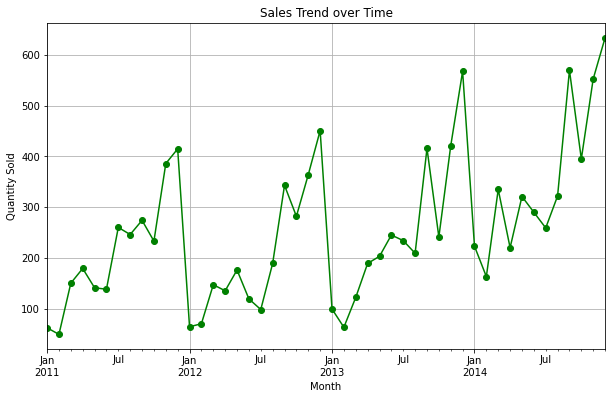

In [18]:
# Question: Sales trend over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Month')['Quantity'].sum()

# Visualization
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='green')
plt.title('Sales Trend over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0, ha='center')
plt.grid(True)
plt.show()

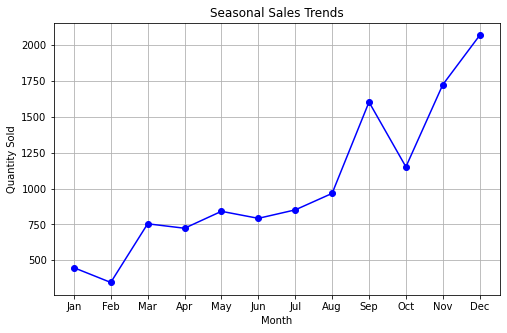

In [19]:
# Question: Seasonal sales trends
seasonal_trends = df.groupby(df['Order Date'].dt.month)['Quantity'].sum()

# Visualization
plt.figure(figsize=(8, 5))
seasonal_trends.plot(kind='line', marker='o', color='blue')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()
